# MuMoT test notebook for using letters from the Greek alphabet

This notebook tests some basic functionality of MuMoT when reactants and rates are Greek letters (with Greek indices). The analysis is based on the honeybee stop-signal model (Seeley et al. (2012) & Pais et al. (2013)) studied in more detail in the user manual. 

In [1]:
import mumot

mumot.__version__

/home/will/.venvs/mumot_dev/lib/python3.6/site-packages/matplotlib/__init__.py:915: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


Created `%%model` as an alias for `%%latex`.


'0.1.0-dev'

In [2]:
%%model
$
U -> \alpha : g_1
U -> \Gamma_\beta : g_2
\alpha -> U : a_1
\Gamma_\beta -> U : a_2
\alpha + U -> \alpha + \alpha : r_1
\Gamma_\beta + U -> \Gamma_\beta + \Gamma_\beta : r_2
\alpha + \Gamma_\beta -> \alpha + U : \sigma
\alpha + \Gamma_\beta -> \Gamma_\beta + U : \sigma
$

<IPython.core.display.Latex object>

In [3]:
model1 = mumot.parseModel(In[2])

FloatSlider(value=2.0, continuous_update=False, description='\\(a_{1}\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=2.0, continuous_update=False, description='\\(a_{2}\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=0.5, continuous_update=False, description='\\(g_{1}\\)', max=1.0, step=0.01, style=SliderStyle(description_width='initial'))

FloatSlider(value=2.0, continuous_update=False, description='\\(g_{2}\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=2.0, continuous_update=False, description='\\(r_{1}\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=2.0, continuous_update=False, description='\\(r_{2}\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=2.0, continuous_update=False, description='\\(\\sigma\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', step=1.0, style=SliderStyle(description_width='initial'))

Accordion(children=(Box(children=(FloatSlider(value=0.5, continuous_update=False, description='$\\Phi_{\\Gamma_{\\beta}}$ at t=0: ', disabled=True, max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.5, continuous_update=False, description='$\\Phi_{U}$ at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{\\alpha}$ at t=0: ', max=0.5, readout_format='.1f', style=SliderStyle(description_width='initial')), FloatSlider(value=10.0, continuous_update=False, description='Simulation time:', max=50.0, min=5.0, readout_format='.0f', step=1.0, style=SliderStyle(description_width='initial')), Checkbox(value=False, description='Plot population proportions')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


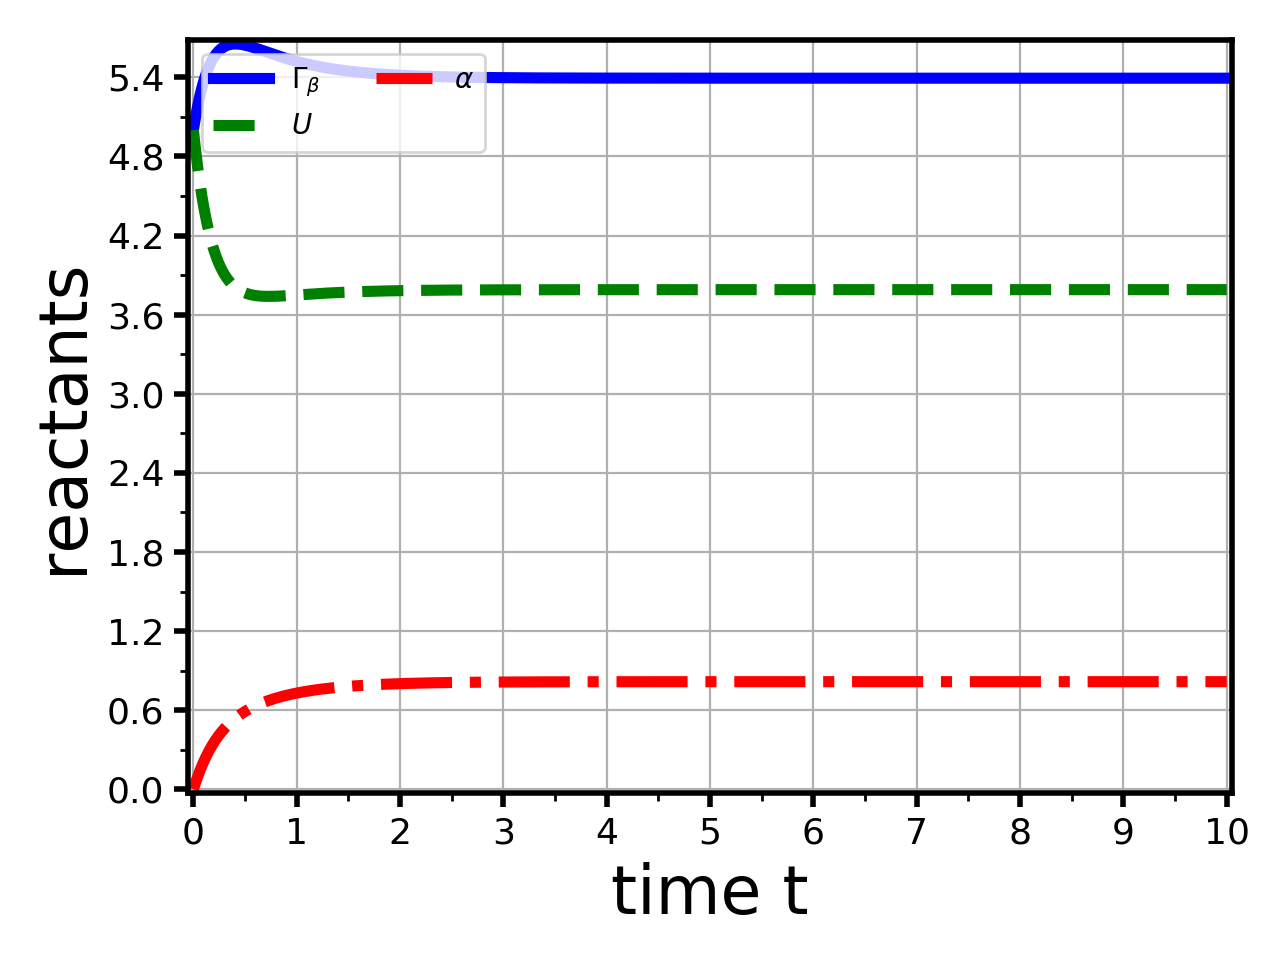

In [4]:
int1 = model1.integrate(showStateVars=['\\alpha', '\\Gamma_\\beta', 'U'],
                        initWidgets={'maxTime':[10,5,50,1], 
                                     'initialState':{'U': [0.5,0,1,0.01],'\\Gamma_\\beta': [0.5,0,1,0.1],'\\alpha': [0,0,1,0.1]},
                                    'g_{1}':[0.5,0,1,0.01]},
        
                       conserved=True)

In [5]:
int1.showLogs()

Starting numerical integration of ODE system with parameters (a_{1}=2.0), (a_{2}=2.0), (g_{1}=0.5), (g_{2}=2.0), (r_{1}=2.0), (r_{2}=2.0), (sigma=2.0), (initGamma_{beta}=0.5), (initU=0.5), (initalpha=0.0), (maxTime=10.0), (conserved=True), at 2018-06-05 10:47:21.819383
Last point on curve:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
model2 = model1.substitute('a_1 = 1/v_1, a_2 = 1/v_2, g_1 = v_1, g_2 = v_2, r_1 = v_1, r_2 = v_2')

In [7]:
model3 = model2.substitute('v_1 = \\mu + \\Delta/2, v_2 = \\mu - \\Delta/2')

In [8]:
model3.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
model3.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
model4 = model3.substitute('U = N - \\alpha - \\Gamma_\\beta')

FloatSlider(value=0.0, continuous_update=False, description='\\(\\Delta\\)', max=2.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=3.0, continuous_update=False, description='\\(\\mu\\)', max=5.0, min=1.0, readout_format='.1f', step=0.5, style=SliderStyle(description_width='initial'))

Accordion(children=(Box(children=(FloatSlider(value=4.8, continuous_update=False, description='Initial \\(\\sigma\\) : ', max=5.0, min=3.0, readout_format='.1f', style=SliderStyle(description_width='initial:')), FloatSlider(value=1.0, continuous_update=False, description='$\\Phi_{\\Gamma_{\\beta}}$ at t=0: ', disabled=True, max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{U}$ at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{\\alpha}$ at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial'))), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


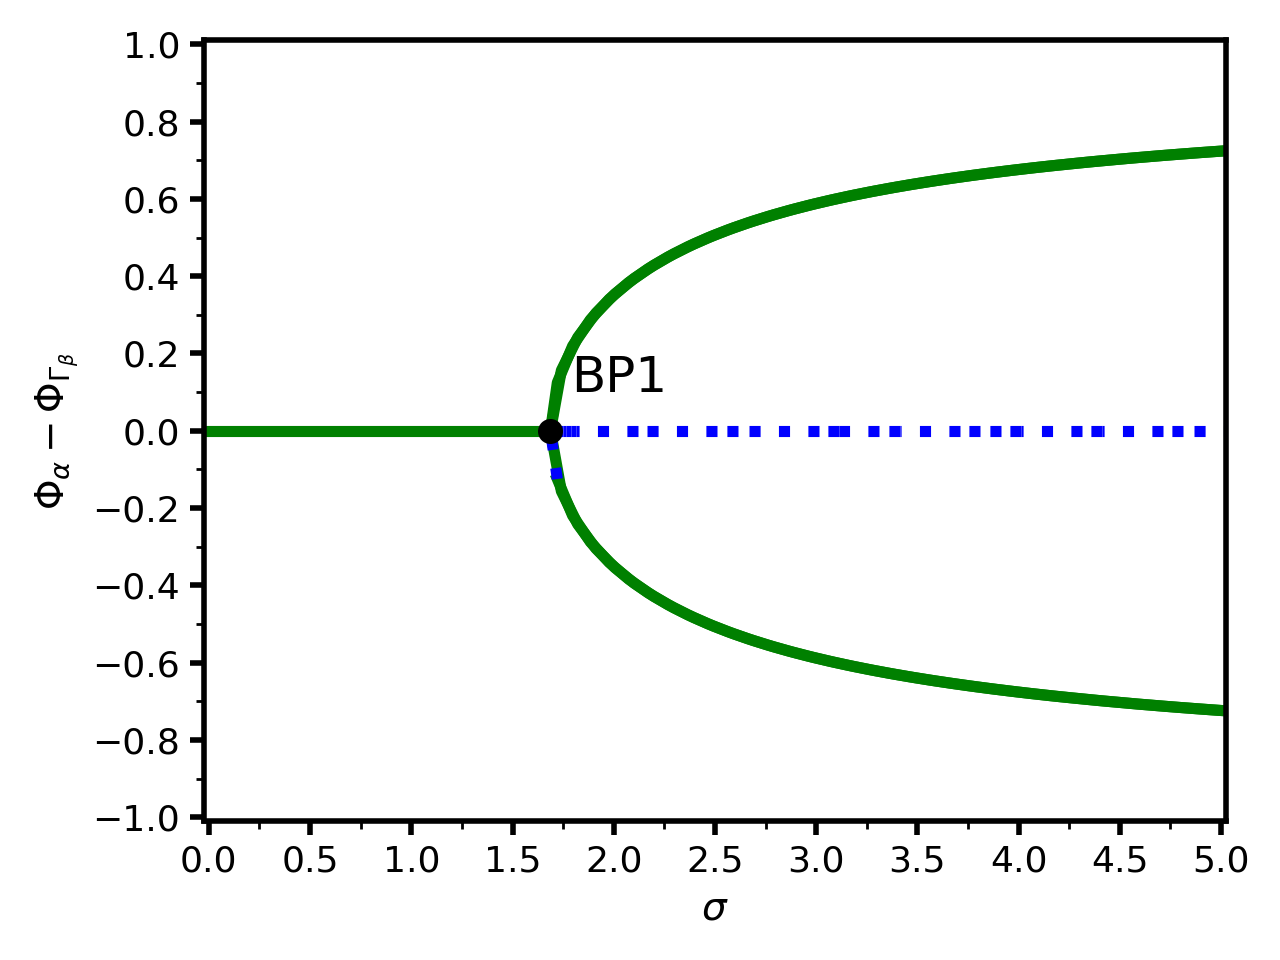

In [11]:
modelBifCont1 = model4.bifurcation('\\sigma','\\alpha-\\Gamma_\\beta', 
                                   initWidgets={'mu':[3, 1, 5, 0.5], 'Delta':[0, 0, 2, 0.1], 
                                                'initBifParam':[4.8, 3, 5, 0.1]},
                                   choose_xrange=[0, 5])

FloatSlider(value=2.0, description='\\(\\Delta\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=2.0, description='\\(\\mu\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=2.0, description='\\(\\sigma\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


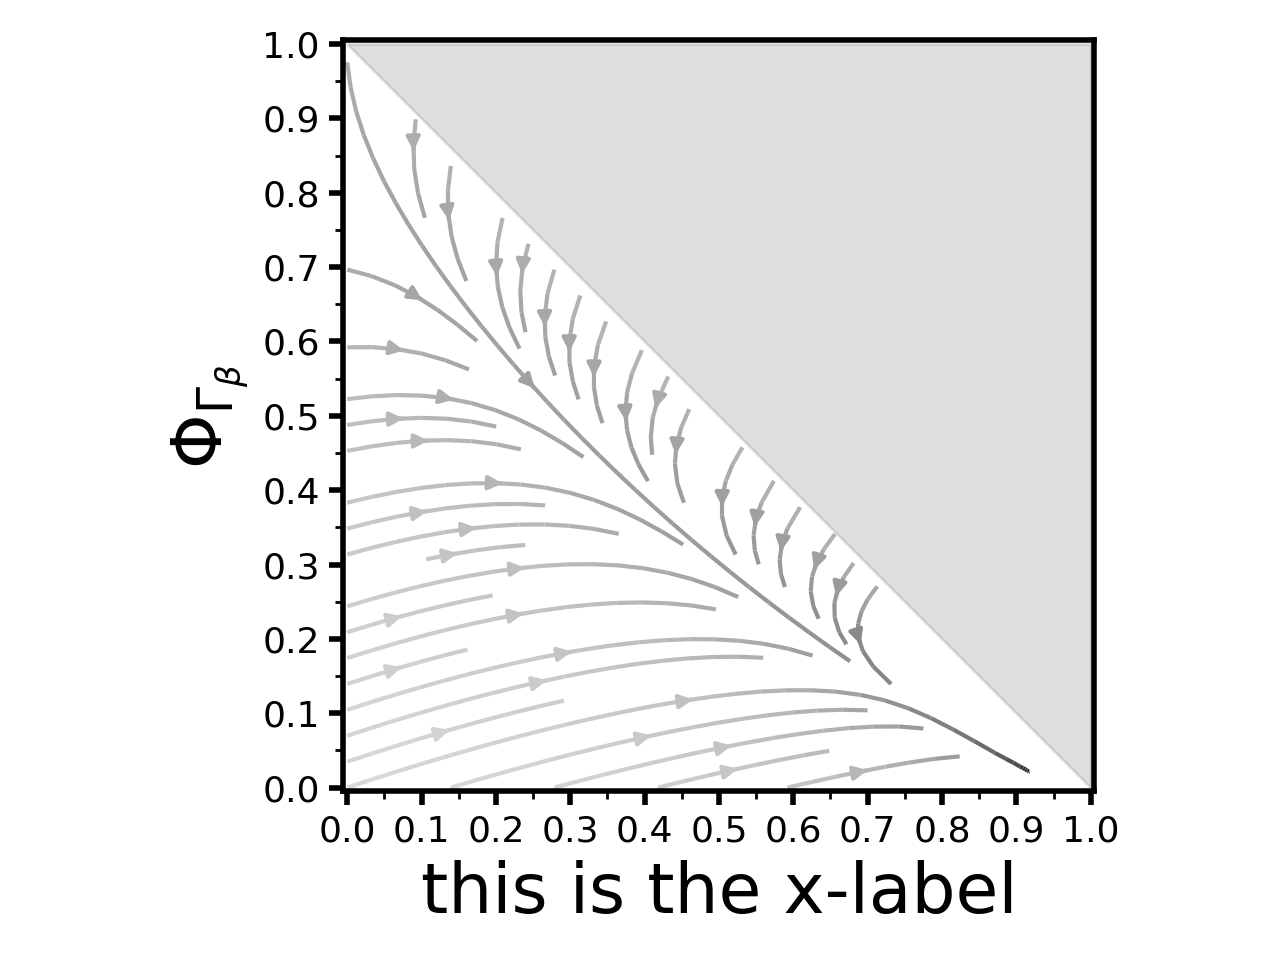

In [12]:
modelStreamCont1 = model4.stream('\\alpha', '\\Gamma_\\beta',fontsize=25, xlab=r'this is the x-label', 
                                 showFixedPoints=False, showNoise=False)

FloatSlider(value=2.0, continuous_update=False, description='\\(\\Delta\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=2.0, continuous_update=False, description='\\(\\mu\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=2.0, continuous_update=False, description='\\(\\sigma\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', step=1.0, style=SliderStyle(description_width='initial'))

Accordion(children=(Box(children=(FloatSlider(value=1.0, continuous_update=False, description='$\\Phi_{\\Gamma_{\\beta}}$ at t=0: ', disabled=True, max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{U}$ at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{\\alpha}$ at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=3.0, continuous_update=False, description='Simulation time:', max=10.0, readout_format='.1f', style=SliderStyle(description_width='initial')), IntText(value=1245413200, description='Random seed:', style=DescriptionStyle(description_width='initial')), ToggleButtons(description='Plot:', options=(('Temporal evolution', 'evo'), ('Final distribution', 'final'), ('Barplot', 'barplot')), tooltips=['Population change over time', 'Population distribution in each state at final timestep', 'Barplot of states at final timestep'], value='evo'), Dropdown(description='Final distribution (x axis):', layout=Layout(display='none'), options=(('Reactant \\(\\Gamma_{\\beta}\\)', 'Gamma_{beta}'), ('Reactant \\(U\\)', 'U'), ('Reactant \\(\\alpha\\)', 'alpha')), style=DescriptionStyle(description_width='initial'), value='Gamma_{beta}'), Dropdown(description='Final distribution (y axis):', index=1, layout=Layout(display='none'), options=(('Reactant \\(\\Gamma_{\\beta}\\)', 'Gamma_{beta}'), ('Reactant \\(U\\)', 'U'), ('Reactant \\(\\alpha\\)', 'alpha')), style=DescriptionStyle(description_width='initial'), value='U'), Checkbox(value=False, description='Plot population proportions'), Checkbox(value=False, description='Runtime plot update'), IntSlider(value=1, continuous_update=False, description='Number of runs:', max=20, min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

FloatProgress(value=0.0, bar_style='success', description='Loading:', max=1.0, style=ProgressStyle(description_width='initial'))

<IPython.core.display.Javascript object>


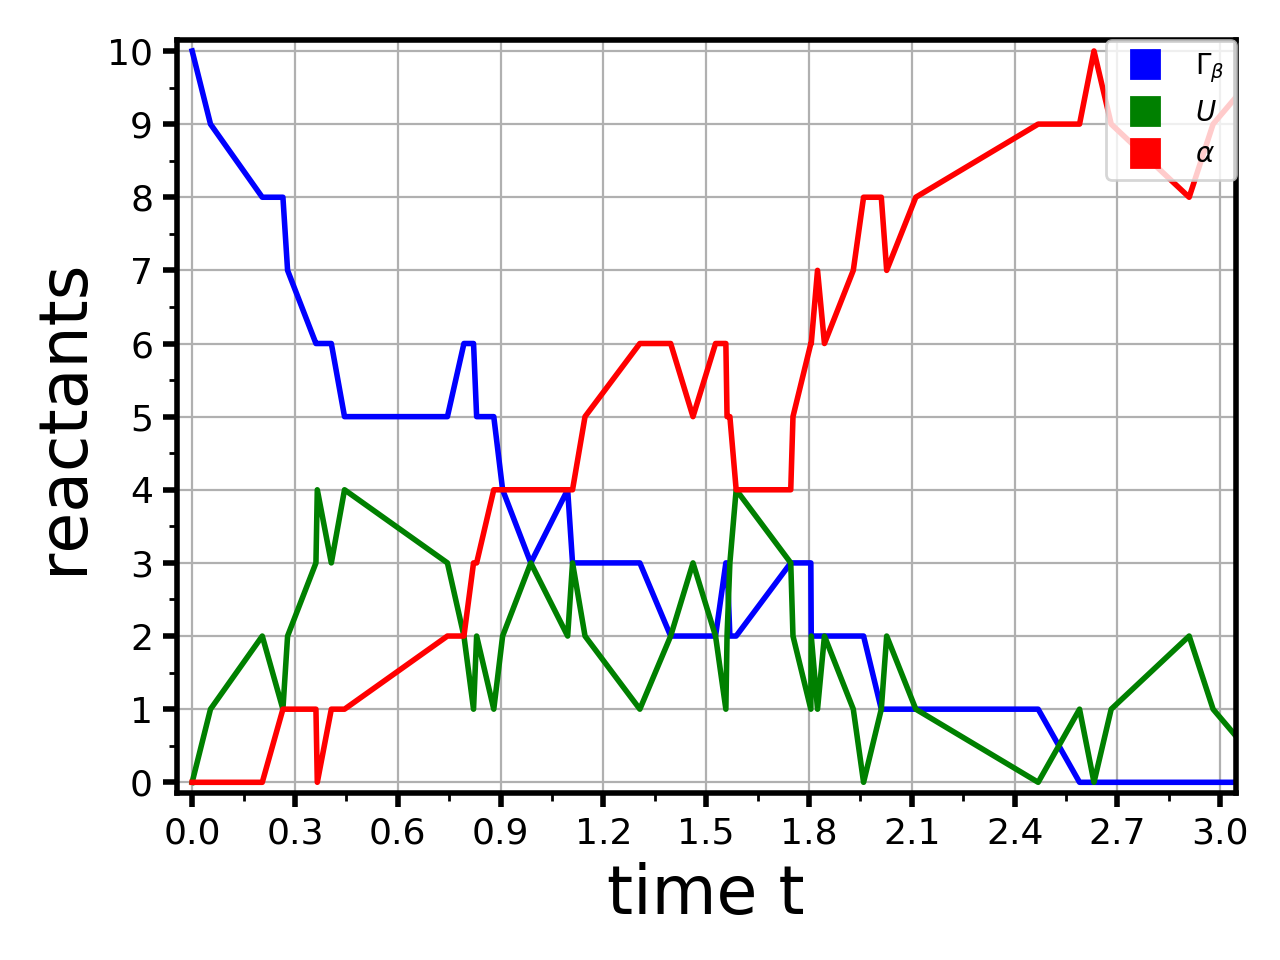

In [13]:
model4.SSA()

In [14]:
model4.showODEs(method='vanKampen')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
model4.showMasterEquation()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
#model4.showFokkerPlanckEquation()

In [ ]:
#model4.showVanKampenExpansion()